In [312]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import train_test_split

In [313]:
n_samples = 20
weight = np.random.normal(loc=50, scale=10, size=n_samples)  # Peso dos ratos em gramas
size = 30 + 0.5 * weight + np.random.normal(loc=0, scale=5, size=n_samples)
tail_size = size * np.random.uniform(0.001,0.1,1)
rats = {
    'weight': weight,
    'size': size,
    'tail_size': tail_size
}
dataframe = pd.DataFrame(rats)
dataframe

,weight,size,tail_size
0,44.662195,63.084849,1.911371
1,47.658090,53.780454,1.629462
2,50.133152,63.421594,1.921573
3,57.800521,57.193007,1.732857
4,59.919013,59.155564,1.792320
5,46.961810,59.928359,1.815734
6,65.547396,60.848667,1.843618
7,48.284237,57.030658,1.727938
8,47.950750,50.640392,1.534323
9,68.266514,62.126929,1.882347


<Axes: >

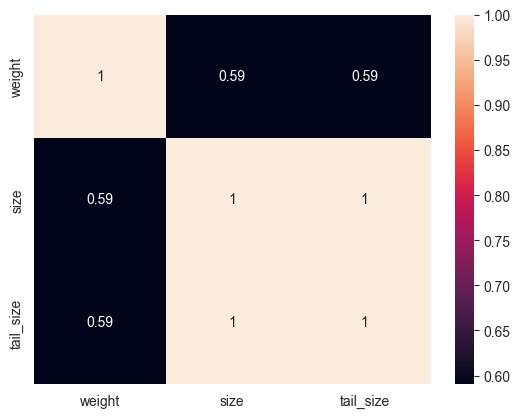

In [314]:
sns.heatmap(dataframe.corr(), annot=True)

# Usando elastic net 

In [315]:
X = dataframe.drop('weight', axis=1)
y = dataframe['weight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [316]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [317]:
y_pred_lr = lr.predict(X_test)

In [318]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [319]:
y_ridge_pred = ridge.predict(X_test)

In [320]:
lasso = Lasso(alpha=0.00001)
lasso.fit(X_train, y_train)

Lasso(alpha=1e-05)

In [321]:
y_lasso_pred = lasso.predict(X_test)

In [322]:
elastic_net = ElasticNet(alpha=0.002, l1_ratio=0.001)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.002, l1_ratio=0.001)

In [323]:
y_elastic_net_pred = elastic_net.predict(X_test)

In [324]:
print('Linear Regression Accuracy:', metrics.r2_score(y_test, y_pred_lr))
print('Ridge Regression Accuracy:', metrics.r2_score(y_test, y_ridge_pred))
print('Lasso Regression Accuracy:', metrics.r2_score(y_test, y_lasso_pred))
print('Elastic Net Accuracy:', metrics.r2_score(y_test, y_elastic_net_pred))

Linear Regression Accuracy: -0.5921496681253466
Ridge Regression Accuracy: -0.5918390040249939
Lasso Regression Accuracy: -0.5921492014843479
Elastic Net Accuracy: -0.5920628416589195


In [325]:
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_
elastic_net_coefs = elastic_net.coef_
print(ridge_coefs)
print(lasso_coefs)
print(elastic_net_coefs)

[0.93215909 0.02824294]
[0.93316764 0.        ]
[0.9323005  0.02721585]


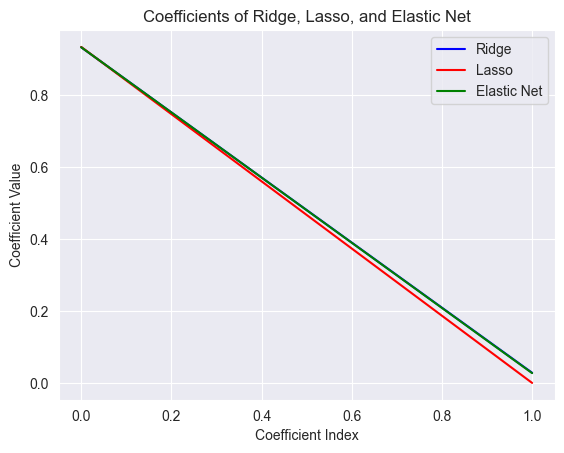

In [326]:
# Passo 5: Trace os coeficientes para cada método em um gráfico
plt.plot(range(len(ridge_coefs)), ridge_coefs, color='blue', label='Ridge')
plt.plot(range(len(lasso_coefs)), lasso_coefs, color='red', label='Lasso')
plt.plot(range(len(elastic_net_coefs)), elastic_net_coefs, color='green', label='Elastic Net')
plt.title('Coefficients of Ridge, Lasso, and Elastic Net')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()

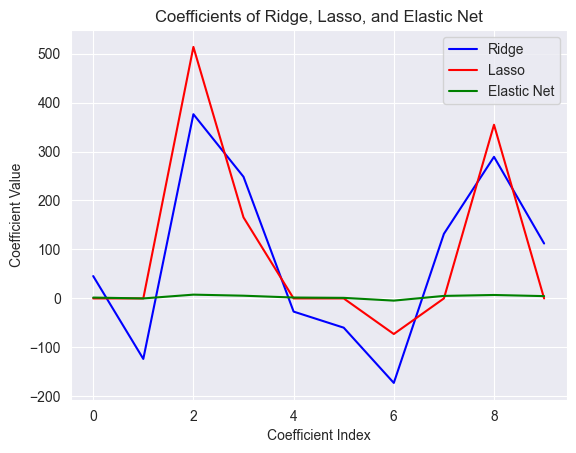

In [327]:

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Passo 1: Importe as bibliotecas necessárias

# Passo 2: Gere dados sintéticos ou carregue um conjunto de dados existente
X, y = datasets.load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Passo 3: Ajuste modelos de regressão usando Ridge, Lasso e Elastic Net
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Passo 4: Extraia os coeficientes dos modelos ajustados
ridge_coefs = ridge.coef_
lasso_coefs = lasso.coef_
elastic_net_coefs = elastic_net.coef_

# Passo 5: Trace os coeficientes para cada método em um gráfico
plt.plot(range(len(ridge_coefs)), ridge_coefs, color='blue', label='Ridge')
plt.plot(range(len(lasso_coefs)), lasso_coefs, color='red', label='Lasso')
plt.plot(range(len(elastic_net_coefs)), elastic_net_coefs, color='green', label='Elastic Net')
plt.title('Coefficients of Ridge, Lasso, and Elastic Net')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()
